# Task Description

The data set, related to customer credit risk, and the description of the attributes are uploaded in the Files. 

There are three tasks for the semestral project, such that
1) Develop a prediction model to classify the customers as good or bad

2) Cluster the customers into various groups

3) Provide some ideas on how frequent pattern mining could be utilized to uncover some patterns in the data and/or to enhance the classification

# Import data
Import the dataset with Pandas pd.read_csv command. Data is seperated with semicolon, so seperation parameter has to be set.

In [7]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('../data/project_data.csv',sep=';')

# Data description

Description of the attributes (columns) in the data and their values:

Attribute X01: Status of existing checking account of the customer
A11: X01 < 0 EUR
A12: 0 <= X01 < 200 EUR
A13: X01 >= 200 EUR
A14: no checking account

Attribute X02: Duration of the credit (requested by the customer from the bank) in month

Attribute X03: Credit history of the customer
A30: no credits taken or all credits paid back duly
A31: all credits at this bank paid back duly
A32: existing credits paid back duly till now
A33: delay in paying off in the past
A34: critical account or other credits existing (not at this bank)

Attribute X04: Purpose of the credit
A40: car (new)
A41: car (used)
A42: furniture/equipment
A43: radio/television
A44: domestic appliances
A45: repairs
A46: education
A47: vacation
A48: retraining
A49: business
A410: others

Attribute X05: Credit amount in EUR

Attibute X06: Savings account/bonds of the customer
A61: X06 < 100 EUR
A62: 100 <= X06 < 500 EUR
A63: 500 <= X06 < 1000 EUR
A64: X06 >= 1000 EUR
A65: unknown/no savings account

Attribute X07: Present employment of the customer since
A71: unemployed
A72: X07 < 1 year
A73: 1 <= X07 < 4 years  
A74: 4 <= X07 < 7 years
A75: X07 >= 7 years

Attribute X08: Installment rate in percentage of disposable income

Attribute X09: Personal status and sex of the customer
A91: male - divorced/separated
A92: female - divorced/separated/married
A93: male - single
A94: male - married/widowed
A95: female - single

Attribute X10: Other debtors or guarantors for the credit
A101: none
A102: co-applicant
A103: guarantor

Attribute X11: Present residence of the customer since (in years)

Attribute X12: Property owned by the customer
A121: real estate
A122: if not A121 - building society savings agreement/life insurance
A123: if not A121/A122 - car or other, not in attribute X06
A124: unknown/no property

Attribute X13: Age of the customer in years

Attribute X14: Other installment plans of the customer
A141: bank
A142: stores
A143: none

Attribute X15: Housing situation of the customer
A151: renting
A152: owning
A153: accommodation (ie. living) for free

Attribute X16: Number of existing credits of the customer at this bank

Attribute X17: Job situation of the customer
A171: unemployed/unskilled  - non-resident
A172: unskilled - resident
A173: skilled employee/official
A174: management/self-employed/highly qualified employee/officer

Attribute X18: Number of people the customer being liable to provide maintenance for

Attribute X19: Telephone of the customer (Note: the data are from 1994, having a phone was not usual back then)
A191: none
A192: yes, registered under the customers name

Attribute X20: if the customer is a foreign worker
A201: yes
A202: no

Attribute Y: label
1 = good customer, ie. paid back the requested credit (see the attributes X02, X04, X05)
2 = bad customer, ie. did not pay back the requested credit (see the attributes X02, X04, X05)

Please, note, that it is five times worse to classify customers as good when they are bad than it is to classify customers bad when they are good!

Display first 5 rows of the data

In [8]:
dataset.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [9]:
# Any missing values?
dataset.isnull().values.any()

False

In [10]:
dataset.describe()

,X02,X05,X08,X11,X13,X16,X18,Y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


# Task desciption

There are three tasks for the semestral project, such that

1) Develop a prediction model to classify the customers as good or bad;

2) Cluster the customers into various groups;

3) Provide some ideas on how frequent pattern mining could be utilized to uncover some patterns in the data and/or to enhance the classification;

## Data Preprocessing

In [11]:
# Split target
X = dataset.iloc[:,:20]
y = dataset.iloc[:,20]

# Feature Scaling with StandardScaler (standardization, z-score normalization)

In [12]:
from sklearn.preprocessing import StandardScaler

col_names = ['X02', 'X05', 'X08', 'X11', 'X13', 'X16', 'X18']
features = X[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

X[col_names] = features
pd.DataFrame(X)

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,A11,-1.236478,A34,A43,-0.745131,A65,A75,0.918477,A93,A101,1.046987,A121,2.766456,A143,A152,1.027079,A173,-0.428290,A192,A201
1,A12,2.248194,A32,A43,0.949817,A61,A73,-0.870183,A92,A101,-0.765977,A121,-1.191404,A143,A152,-0.704926,A173,-0.428290,A191,A201
2,A14,-0.738668,A34,A46,-0.416562,A61,A74,-0.870183,A93,A101,0.140505,A121,1.183312,A143,A152,-0.704926,A172,2.334869,A191,A201
3,A11,1.750384,A32,A42,1.634247,A61,A74,-0.870183,A93,A103,1.046987,A122,0.831502,A143,A153,-0.704926,A173,2.334869,A191,A201
4,A11,0.256953,A33,A40,0.566664,A61,A73,0.024147,A93,A101,1.046987,A124,1.535122,A143,A153,1.027079,A173,2.334869,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,-0.738668,A32,A42,-0.544162,A61,A74,0.024147,A92,A101,1.046987,A121,-0.399832,A143,A152,-0.704926,A172,-0.428290,A191,A201
996,A11,0.754763,A32,A41,0.207612,A61,A73,0.918477,A91,A101,1.046987,A122,0.391740,A143,A152,-0.704926,A174,-0.428290,A192,A201
997,A14,-0.738668,A32,A43,-0.874503,A61,A75,0.918477,A93,A101,1.046987,A123,0.215835,A143,A152,-0.704926,A173,-0.428290,A191,A201
998,A11,1.999289,A32,A43,-0.505528,A61,A73,0.918477,A93,A101,1.046987,A124,-1.103451,A143,A153,-0.704926,A173,-0.428290,A192,A201


# One-Hot encoding for categorical features

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#onehotencoder = OneHotEncoder(sparse = False)
#X_encoded = onehotencoder.fit_transform(X)
X = pd.get_dummies(X)
#y = pd.get_dummies(y)
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
pd.DataFrame(X)

,X02,X05,X08,X11,X13,X16,X18,X01_A11,X01_A12,X01_A13,...,X15_A152,X15_A153,X17_A171,X17_A172,X17_A173,X17_A174,X19_A191,X19_A192,X20_A201,X20_A202
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1,0,0,...,1,0,0,0,1,0,0,1,1,0
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1,0,0,...,0,1,0,0,1,0,1,0,1,0
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,1,0,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.428290,0,0,0,...,1,0,0,1,0,0,1,0,1,0
996,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.428290,1,0,0,...,1,0,0,0,0,1,0,1,1,0
997,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.428290,0,0,0,...,1,0,0,0,1,0,1,0,1,0
998,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.428290,1,0,0,...,0,1,0,0,1,0,0,1,1,0


In [14]:
# 0 -> good customer, 1 -> bad customer
pd.DataFrame(y)

,0
0,0
1,1
2,0
3,0
4,1
...,...
995,0
996,0
997,0
998,1


## Split dataset


In [15]:
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)
print("train set: ", Counter(y_train))
print("test set: ", Counter(y_test))

train set:  Counter({0: 525, 1: 225})
test set:  Counter({0: 175, 1: 75})


In [16]:
pd.DataFrame(y_test)

,0
0,1
1,0
2,0
3,0
4,0
...,...
245,1
246,0
247,0
248,0


In [17]:
pd.DataFrame(X)

,X02,X05,X08,X11,X13,X16,X18,X01_A11,X01_A12,X01_A13,...,X15_A152,X15_A153,X17_A171,X17_A172,X17_A173,X17_A174,X19_A191,X19_A192,X20_A201,X20_A202
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1,0,0,...,1,0,0,0,1,0,0,1,1,0
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1,0,0,...,0,1,0,0,1,0,1,0,1,0
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,1,0,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.428290,0,0,0,...,1,0,0,1,0,0,1,0,1,0
996,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.428290,1,0,0,...,1,0,0,0,0,1,0,1,1,0
997,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.428290,0,0,0,...,1,0,0,0,1,0,1,0,1,0
998,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.428290,1,0,0,...,0,1,0,0,1,0,0,1,1,0


# Prediction Model

In [21]:
import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

matplotlib.rcParams.update({'font.size': 16})

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Oranges):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[1])
    plt.xticks(tick_marks, rotation=45)
    ax = plt.gca()
    ax.set_xticklabels((ax.get_xticks()).astype(str))
    plt.yticks(tick_marks)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.1f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Binary Classification with Logistic Regression

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve


"""
n_neighbors: int, default = 5
    Number of neighbors to use by default for kneighbors queries.

p: int, default = 2
    When p = 1, this is equivalent to using manhattan_distance (l1), 
    and euclidean_distance (l2) for p = 2. 
    For arbitrary p, minkowski_distance (l_p) is used.
"""

hyper_params = {
                'C':np.logspace(-4,4,50),
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
               }

grid = GridSearchCV(LogisticRegression(max_iter=1500), hyper_params)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.05963623316594643, 'solver': 'liblinear'}

     Actual  Predicted
0         1          1
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
245       1          0
246       0          0
247       0          0
248       0          0
249       0          1

[250 rows x 2 columns]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       175
           1       0.73      0.47      0.57        75

    accuracy                           0.79       250
   macro avg       0.77      0.70      0.71       250
weighted avg       0.78      0.79      0.77       250

0.8098285714285715
Confusion matrix, without normalization
[[162  13]
 [ 40  35]]


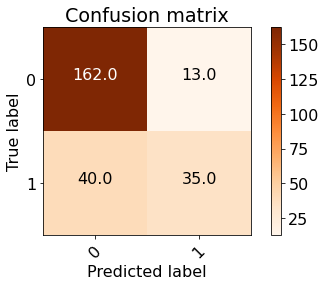

In [22]:

#lr = LogisticRegression(max_iter = 100)
lr=LogisticRegression(C=grid.best_params_['C'], max_iter=1000, solver=grid.best_params_['solver'])
lr.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = lr.predict(X_test)

#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(df)

print(classification_report(y_test, y_pred))

# Probabilities for each class
lr_probs = lr.predict_proba(X_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, lr_probs)
print(roc_value)

cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision= 1 )
print('Confusion matrix, without normalization')
print(cm)
fig, ax = plt.subplots()
plot_confusion_matrix(cm)

plt.show()

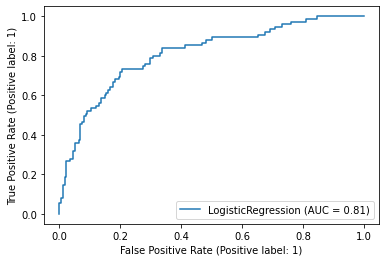

In [34]:
plot_roc_curve(lr, X_test, y_test) 
plt.show()

## Naive Bayes Regression

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

"""
n_neighbors: int, default = 5
    Number of neighbors to use by default for kneighbors queries.

p: int, default = 2
    When p = 1, this is equivalent to using manhattan_distance (l1), 
    and euclidean_distance (l2) for p = 2. 
    For arbitrary p, minkowski_distance (l_p) is used.
"""

hyper_params = {
                'var_smoothing': np.logspace(0, -9, num=100)
               }

grid = GridSearchCV(GaussianNB(), param_grid=hyper_params, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'var_smoothing': 0.23101297000831597}

     Actual  Predicted
0         1          1
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
245       1          0
246       0          0
247       0          0
248       0          0
249       0          1

[250 rows x 2 columns]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       175
           1       0.65      0.40      0.50        75

    accuracy                           0.76       250
   macro avg       0.72      0.65      0.67       250
weighted avg       0.74      0.76      0.74       250

0.7892571428571429
Confusion matrix, without normalization
[[159  16]
 [ 45  30]]


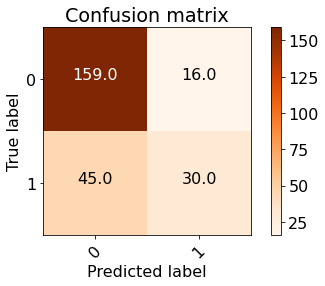

In [24]:
# creating the NB model
#gnb = GaussianNB()
gnb = GaussianNB(var_smoothing=grid.best_params_['var_smoothing'])
gnb.fit(X_train, y_train)
# fitting and predicting the data
y_pred1 = gnb.predict(X_test)

df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred1})
print(df)

# printing classification performances
print(classification_report(y_test, y_pred1))

# Probabilities for each class
gnb_probs = gnb.predict_proba(X_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, gnb_probs)
print(roc_value)

cm = confusion_matrix(y_test, y_pred1)
np.set_printoptions(precision= 1 )
print('Confusion matrix, without normalization')
print(cm)
fig, ax = plt.subplots()
plot_confusion_matrix(cm)

plt.show()

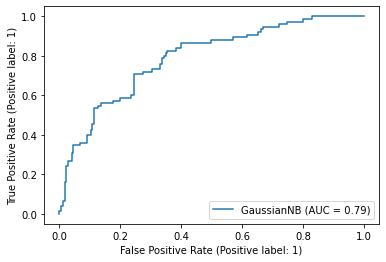

In [21]:
plot_roc_curve(gnb, X_test, y_test) 
plt.show()

## KNN

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

"""
n_neighbors: int, default = 5
    Number of neighbors to use by default for kneighbors queries.

p: int, default = 2
    When p = 1, this is equivalent to using manhattan_distance (l1), 
    and euclidean_distance (l2) for p = 2. 
    For arbitrary p, minkowski_distance (l_p) is used.
"""

hyper_params = {
                'n_neighbors': range(1,16),
                'p':range(1,5)
               }

grid = GridSearchCV(KNeighborsClassifier(), hyper_params)
grid.fit(X_train, y_train)
grid.best_params_

{'n_neighbors': 15, 'p': 1}

     Actual  Predicted
0         1          1
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
245       1          0
246       0          0
247       0          0
248       0          0
249       0          0

[250 rows x 2 columns]
              precision    recall  f1-score   support

           0       0.74      0.96      0.84       175
           1       0.71      0.23      0.34        75

    accuracy                           0.74       250
   macro avg       0.73      0.59      0.59       250
weighted avg       0.73      0.74      0.69       250

0.7611428571428571
Confusion matrix, without normalization
[[168   7]
 [ 58  17]]


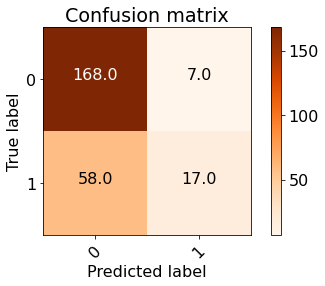

In [26]:
#knn = KNeighborsClassifier(n_neighbors = 5)
knn = KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors'], p = grid.best_params_['p'])
knn.fit(X_train, y_train)

y_pred2 = knn.predict(X_test)

df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred2})
print(df)

print(classification_report(y_test, y_pred2))

# Probabilities for each class
knn_probs = knn.predict_proba(X_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, knn_probs)
print(roc_value)

cm = confusion_matrix(y_test, y_pred2)
np.set_printoptions(precision= 1 )
print('Confusion matrix, without normalization')
print(cm)
fig, ax = plt.subplots()
plot_confusion_matrix(cm)

plt.show()

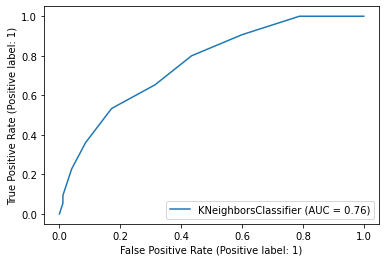

In [24]:
plot_roc_curve(knn, X_test, y_test) 
plt.show()

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
hyper_params = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), hyper_params, cv= 5)
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

     Actual  Predicted
0         1          1
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
245       1          0
246       0          0
247       0          0
248       0          0
249       0          0

[250 rows x 2 columns]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       175
           1       0.67      0.37      0.48        75

    accuracy                           0.76       250
   macro avg       0.72      0.65      0.66       250
weighted avg       0.74      0.76      0.73       250

0.7998476190476189
Confusion matrix, without normalization
[[161  14]
 [ 47  28]]


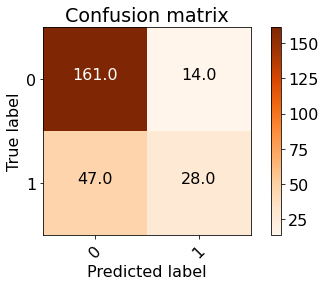

In [28]:
# Create the model with 100 trees
rfc = RandomForestClassifier(random_state=42, n_estimators=grid.best_params_['n_estimators'], max_features=grid.best_params_['max_features'], 
                               bootstrap = True, max_depth=grid.best_params_['max_depth'],
                               criterion = grid.best_params_['criterion'])
# Fit on training data
rfc.fit(X_train, y_train)

# Actual class predictions
y_pred3 = rfc.predict(X_test)
# Probabilities for each class
rf_probs = rfc.predict_proba(X_test)[:, 1]
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred3})
print(df)
print(classification_report(y_test, y_pred3))

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print(roc_value)

cm = confusion_matrix(y_test, y_pred3)
np.set_printoptions(precision= 1 )
print('Confusion matrix, without normalization')
print(cm)
fig, ax = plt.subplots()
plot_confusion_matrix(cm)

plt.show()

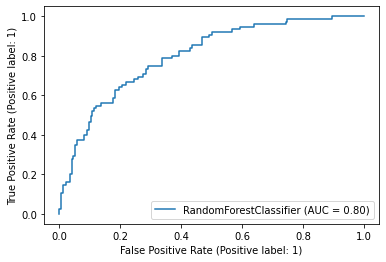

In [28]:
plot_roc_curve(rfc, X_test, y_test) 
plt.show()

## Support Vector Machine

In [29]:
from sklearn.svm import SVC

hyper_params = {
                'C': [0.001, 0.01, 0.1, 1, 10],
                'gamma':[0.0001, 0.001, 0.01, 0.1, 1],
                'degree': [0, 1, 2, 3, 4, 5, 6]
               }

grid = GridSearchCV(SVC(kernel='poly',probability=True), hyper_params)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.1, 'degree': 1, 'gamma': 1}

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       175
           1       0.67      0.47      0.55        75

    accuracy                           0.77       250
   macro avg       0.74      0.68      0.70       250
weighted avg       0.76      0.77      0.76       250

0.7905142857142857
Confusion matrix, without normalization
[[158  17]
 [ 40  35]]


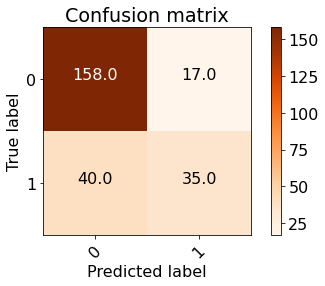

In [30]:
#Create a svm Classifier
svmc = SVC(kernel='poly',probability=True, C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], degree=grid.best_params_['degree']) # Linear Kernel

#Train the model using the training sets
svmc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred4 = svmc.predict(X_test)

# Probabilities for each class
svmc_probs = svmc.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred4))

# Calculate roc auc
roc_value = roc_auc_score(y_test, svmc_probs)
print(roc_value)

cm = confusion_matrix(y_test, y_pred4)
np.set_printoptions(precision= 1 )
print('Confusion matrix, without normalization')
print(cm)
fig, ax = plt.subplots()
plot_confusion_matrix(cm)

plt.show()

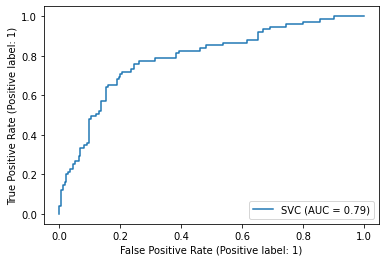

In [31]:
plot_roc_curve(svmc, X_test, y_test) 
plt.show()